In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Converting the image to black and white:

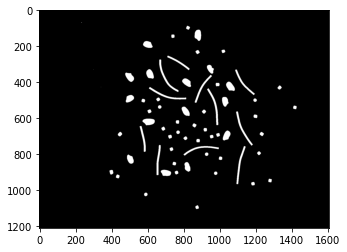

In [28]:
image = cv2.imread('OriginalImage.tif') 

(thresh, blackAndWhiteImage) = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

plt.imshow(blackAndWhiteImage, cmap='gray')

#cv2.imwrite("BWimage.png", blackAndWhiteImage)

Erosion to detect pasta (15):

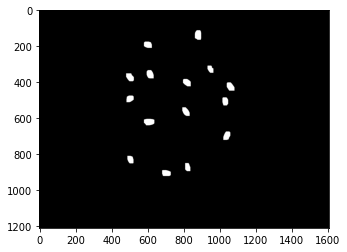

In [16]:
kernel = np.ones((18, 18), np.uint8)
 
img_erosion = cv2.erode(blackAndWhiteImage, kernel, iterations=1)
pasta = cv2.dilate(img_erosion, kernel)

plt.imshow(pasta, cmap='gray')

Erosion to detect grains (39):

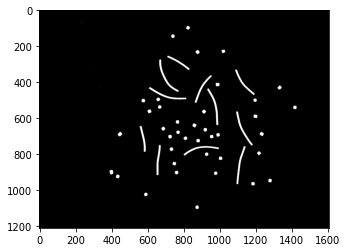

In [19]:
kernel = np.ones((30, 30), np.uint8)
#kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15))
#kernel2 = cv2.getStructuringElement(cv2.MORPH_CROSS,(15,15))

img_again = cv2.dilate(pasta, kernel)
#First we substract the pasta image to get rid of it and 

sub = cv2.subtract(blackAndWhiteImage,img_again)

plt.imshow(sub, cmap='gray')

Now we work with the substracted image, where only spaguetti and grains appear:

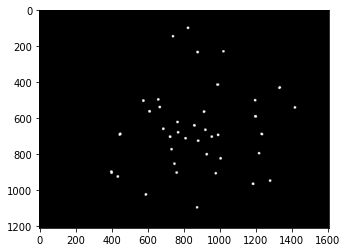

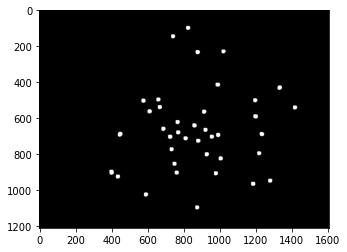

In [85]:
kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15)) #Important els kernels en funcio de la imagee

grains = cv2.erode(sub, kernel3)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))
grains = cv2.dilate(grains, kernel)

plt.imshow(grains,cmap="gray")
plt.show()

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))
to_sub = cv2.dilate(grains, kernel)

plt.imshow(to_sub,cmap="gray")

Erosion to detect spaguetti (11):

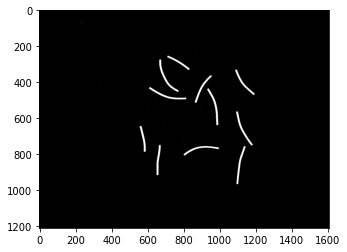

In [86]:
spaguetti = cv2.subtract(sub, to_sub)
plt.imshow(spaguetti,cmap="gray")

Save obtained images:

In [4]:
cv2.imwrite("pasta.png", pasta)
cv2.imwrite("grains.png", grains)
cv2.imwrite("spaguetti.png", spaguetti)

NameError: name 'pasta' is not defined

Counting number of elements:

In [5]:
pasta = cv2.imread("pasta.png")
grains = cv2.imread("grains.png")
spagutti = cv2.imread("spaguetti.png")

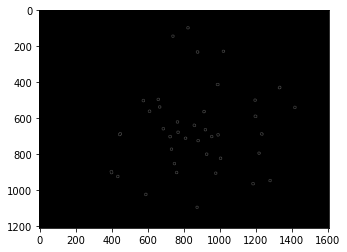

In [29]:
canny = cv2.Canny(grains, 0,250, 4)
plt.imshow(canny, cmap='gray')

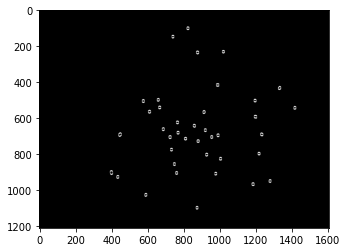

In [30]:
dilated = cv2.dilate(canny, (15, 15), iterations=5)
plt.imshow(dilated, cmap='gray')

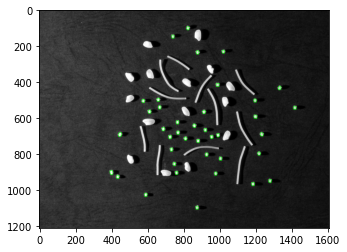

In [32]:
(cnt, hierarchy) = cv2.findContours(
    dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(image, cnt, -1, (0, 255, 0), 2)
 
plt.imshow(rgb)

In [11]:
print("Pasta in the image : ", len(cnt))

Pasta in the image :  15


Elements in the image :  15
Elements in the image :  39
Elements in the image :  11


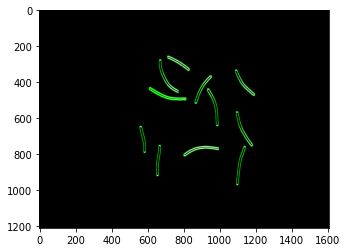

In [94]:
for i in [pasta, grains, spaguetti]:
    blur = cv2.GaussianBlur(i, (11, 11), 0)
    plt.imshow(blur, cmap='gray')
    canny = cv2.Canny(blur, 0,250, 4)
    plt.imshow(canny, cmap='gray')
    dilated = cv2.dilate(canny, (15, 15), iterations=5)
    plt.imshow(dilated, cmap='gray')
    (cnt, hierarchy) = cv2.findContours(
    dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        
    rgb = cv2.cvtColor(dilated, cv2.COLOR_BGR2RGB)
    cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)
    
    plt.imshow(rgb)

    print("Elements in the image : ", len(cnt))

Problems we had:

- Detection of grains failed -> Very close grains were considered as only 1. We fixed it by doing a lower dilation in the segmentation step.

Second practise

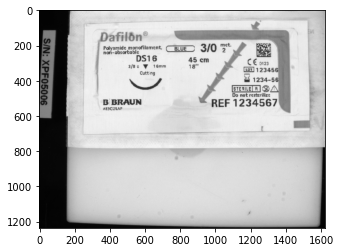

In [2]:
image2 = cv2.imread('n.bmp')
gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

#We are allowed to use mask, cut the number and use correlation with another image with the number

In [3]:
(thresh, roibw) = cv2.threshold(image2, 130, 255, cv2.THRESH_BINARY)
invert = cv2.bitwise_not(roibw)

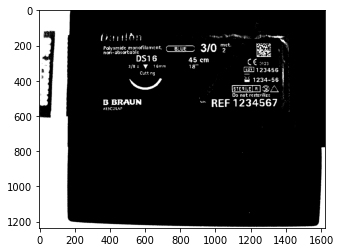

In [4]:
plt.imshow(invert, cmap='gray')

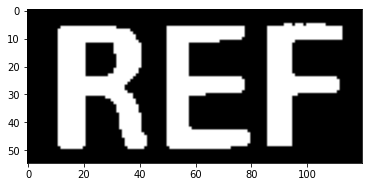

In [7]:
ref = invert[500:555,970:1090]
plt.imshow(ref, cmap='gray')

threshold to avoid problems with the background
Pattern 
detection with blood detector
correlation to find similarity between objects